In [9]:
directories = {
    "discrete": [
        "hiv_test", 
        "hayes_roth",
        "balance_scale", 
        "car_evaluation",
        "nursery", 
        "breast_cancer", 
        "web_phishing",
        "solar_flare",
        "zoo",
        "vote", 
        "spect_heart",
        "alarm"
    ],
    "continuous" : [
        "real_state_valuation", 
        "buddymove", 
        "qsar_fish_toxicity", 
        "qsar_aqua_toxicity", 
        "ilpd",
        "alcohol",
        "travel_reviews",
        "wine_quality_white", 
        "wine", 
        "leaf", 
        "nba", 
        "wdbc"
    ],
    "mixed": [
        "haberman", 
        "iris", 
        "user_knowledge",
        "vertebral", 
        "ecoli", 
        "planning_relax", 
        "thoracic_surgery",
        "vehicle", 
        "thyroid",
        "parkinsons", 
        "autos", 
        "ionosphere"
    ]
}


# 1 - Accuracy error

Iteramos por los datasets de los directorios de **discrete** y **mixed**, agrupando sus accuracy errors

In [10]:
import pandas as pd
import json
import statistics as stats
from os import listdir
import numpy as np

methods = [
    "MEAN", 
    "MICE", 
    "GLFM", 
    "HIVAE", 
    "VBSEM",
    "glsl_EMPTY"
]
max_percentage = 6
n_runs = 5
accuracy_error_dfs = []
selected_directories = ["discrete", "mixed"]


# Iterate through the missing percentage values, and for each dataset, recover the methods' results
for i in range(1, max_percentage):
    miss_percentage_string = "0" + str(i)

    df_error_results = pd.DataFrame()
    
    for directory in selected_directories:
        
        data_names = directories[directory]
        
        for data_name in data_names:
            error_results = {"dataset": data_name}
            for method_name in methods:

                json_name = data_name + "_" + miss_percentage_string + "_results_" + method_name + ".json"
                full_path = "../../missing_results/"+ directory +"/"+data_name+"/"+json_name
                with open(full_path) as json_file:
                    json_data = json.load(json_file)
                    runs_data = json_data["runs"]
                    errors = []
                    learning_times = []
                    for i in range(1, n_runs + 1):
                        errors.append(1.0 - runs_data["run_" + str(i)]["accuracy"]) 

                    avg_error = stats.mean(errors)
                    stdev_error = stats.stdev(errors)

                    error_results[method_name] = avg_error

            df_error_results = df_error_results.append(error_results, ignore_index=True)

    accuracy_error_dfs.append(df_error_results)

for i in range(0, max_percentage-1):
    accuracy_error_dfs[i]["GLSL"] = accuracy_error_dfs[i][['VBSEM','glsl_EMPTY']].min(axis=1)

In [11]:
accuracy_error_dfs[0]

,GLFM,HIVAE,MEAN,MICE,VBSEM,dataset,glsl_EMPTY,GLSL
0,0.122807,0.072037,0.418713,0.090058,0.088889,hiv_test,0.130503,0.088889
1,0.622500,0.617484,0.672500,0.565000,0.475000,hayes_roth,0.475147,0.475000
2,0.667308,0.498553,0.808974,0.654487,0.589103,balance_scale,0.587602,0.587602
3,0.591894,0.612227,0.680397,0.604963,0.579322,car_evaluation,0.574193,0.574193
4,0.625257,0.567458,0.691564,0.667061,0.557990,nursery,0.556015,0.556015
5,0.449819,0.379871,0.450542,0.380505,0.373285,breast_cancer,0.359462,0.359462
6,0.413895,0.347323,0.474353,0.419364,0.287509,web_phishing,0.276734,0.276734
7,0.284875,0.190265,0.273463,0.254958,0.179945,solar_flare,0.196490,0.179945
8,0.195322,0.097538,0.316959,0.116959,0.088889,zoo,0.099664,0.088889
9,0.260406,0.191786,0.419289,0.187310,0.206091,vote,0.188649,0.188649


## 1.1 - Average rank table

In [12]:
selected_methods = [
    "MICE", 
    "GLFM", 
    "HIVAE", 
    "GLSL"
]
accuracy_error_mean_rank = pd.DataFrame(columns=selected_methods)
accuracy_error_std_rank = pd.DataFrame(columns=selected_methods)
error_rank_dfs = []

for i in range(0,5):
    error_rank_df = accuracy_error_dfs[i][selected_methods].rank(method="max", axis = 1, ascending = 1)
    error_rank_df["dataset"] = accuracy_error_dfs[i]["dataset"]
    error_rank_dfs.append(error_rank_df)
    accuracy_error_mean_rank = accuracy_error_mean_rank.append(error_rank_df[selected_methods].mean(axis = 0), ignore_index=True)
    accuracy_error_std_rank = accuracy_error_std_rank.append(error_rank_df[selected_methods].std(axis = 0), ignore_index=True)

accuracy_error_mean_rank["miss_percentage"] = [str(i)+"0%" for i in range(1,6)]
accuracy_error_std_rank["miss_percentage"] = [str(i)+"0%" for i in range(1,6)]
accuracy_error_mean_rank

,MICE,GLFM,HIVAE,GLSL,miss_percentage
0,2.833333,3.375000,2.291667,1.541667,10%
1,2.958333,3.375000,2.166667,1.500000,20%
2,3.250000,3.333333,1.833333,1.583333,30%
3,3.333333,3.166667,1.916667,1.583333,40%
4,3.166667,3.291667,1.708333,1.833333,50%


In [13]:
accuracy_error_std_rank

,MICE,GLFM,HIVAE,GLSL,miss_percentage
0,1.090140,0.875388,0.806450,0.832971,10%
1,0.999094,0.875388,0.761387,0.834058,20%
2,0.737210,0.701964,0.701964,1.017955,30%
3,0.868115,0.816497,0.717282,0.928611,40%
4,0.868115,0.806450,0.624094,1.090140,50%


In [14]:
# Show the rank/error of each method for each dataset for a specific missing percentage
#error_rank_dfs[4]
#accuracy_error_dfs[0]

## 1.2 - Error plot

Para generar un bar plot tenemos que combinar los DFs de resultados en uno solo que tenga 4 columnas:
* dataset
* method
* percentage
* error_value

In [15]:
df_plot = pd.DataFrame(columns=["dataset", "method", "percentage", "accuracy_error"])

for percentage in range(0, 5):
    df = accuracy_error_dfs[percentage]
    percentage_string = str((percentage+1)*10) + "%"
    for method in selected_methods:
        for i in range(len(df)):
            row = df.loc[i]
            instance = {"dataset": row["dataset"]}
            instance["percentage"] = percentage_string
            instance["method"] = method
            instance["accuracy_error"] = row[method]
            df_plot = df_plot.append(instance, ignore_index=True)            

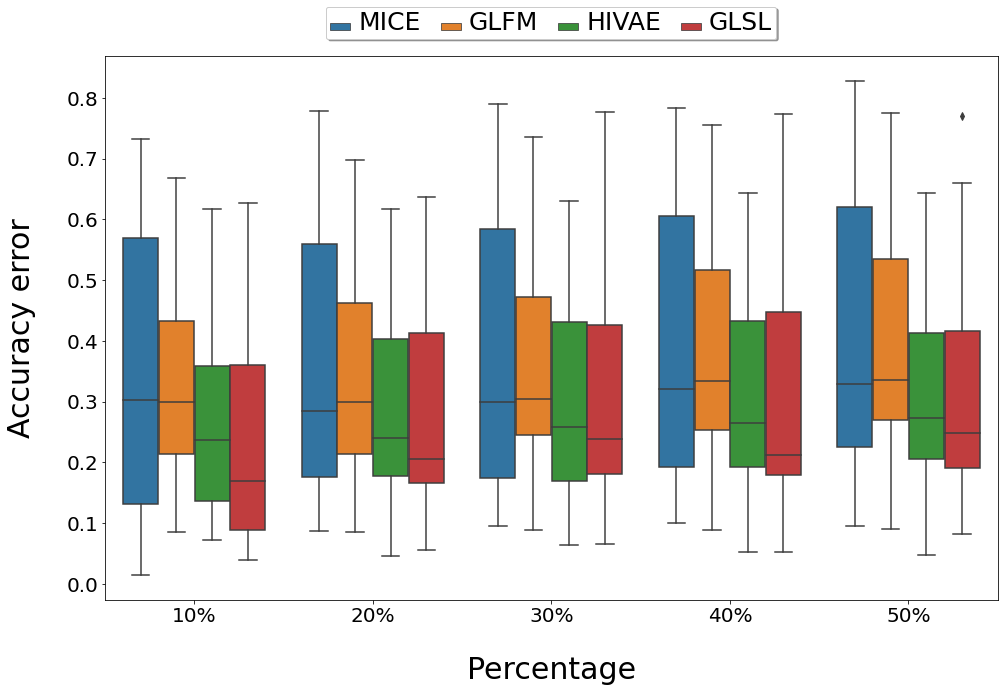

In [16]:
from matplotlib import pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(16,10))
g = sns.boxplot(data=df_plot,x="percentage", y="accuracy_error", hue="method", ax = ax)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.10),
          ncol=5, fancybox=True, shadow=True)
plt.setp(ax.get_legend().get_texts(), fontsize='25') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='0') # for legend title
ax.tick_params(axis="x", labelsize=20) # x ticks font size
ax.tick_params(axis="y", labelsize=20) # y ticks font size
plt.xlabel('Percentage', fontsize=30, labelpad=30)
plt.ylabel('Accuracy error', fontsize=30, labelpad=30)

plt.savefig('missing_plots/accuracy_error_plot.pdf')  

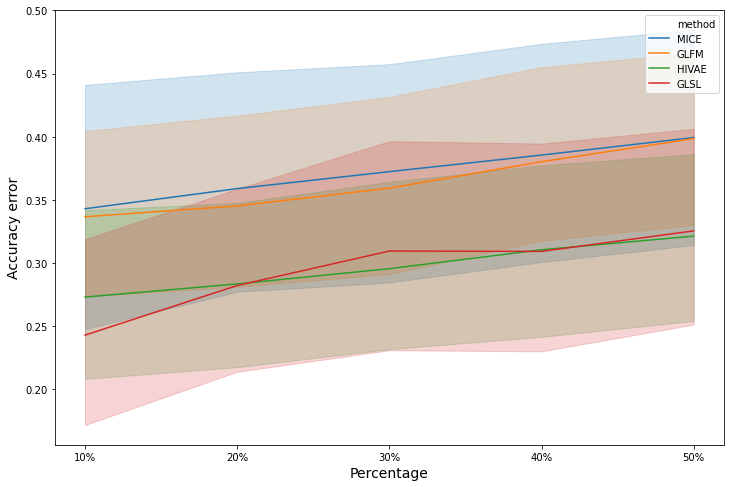

In [17]:
from matplotlib import pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(12,8))
g = sns.lineplot(data=df_plot,x="percentage", y="accuracy_error", hue="method", ax = ax)
plt.xlabel('Percentage', fontsize=14)
ylabel = plt.ylabel('Accuracy error', fontsize=14)

## 1.3 - Nemenyi tests

Missing percentage: 10%


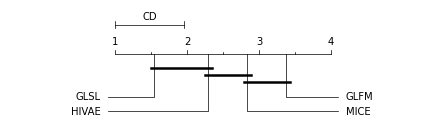

Missing percentage: 20%


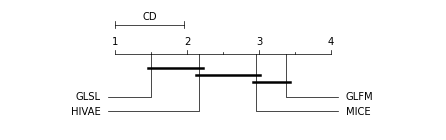

Missing percentage: 30%


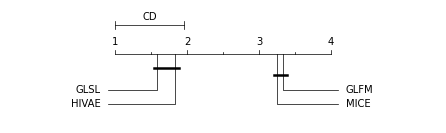

Missing percentage: 40%


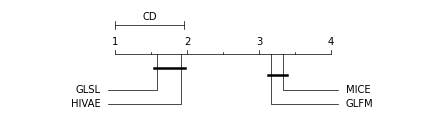

Missing percentage: 50%


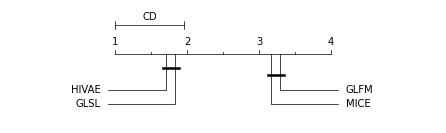

In [18]:
import Orange
import matplotlib.pyplot as plt

n_datasets = accuracy_error_dfs[0].shape[0]

for i in range(0, accuracy_error_mean_rank.shape[0]):
    avranks = accuracy_error_mean_rank[selected_methods].iloc[i].values
    cd = Orange.evaluation.compute_CD(avranks, n_datasets) #tested on 30 datasets
    Orange.evaluation.graph_ranks(avranks, selected_methods, cd=cd,width=6, textspace=1.5)
    print("Missing percentage: " + str(accuracy_error_mean_rank["miss_percentage"].iloc[i]))
    plt.savefig('missing_plots/accuracy_error_' + str(accuracy_error_mean_rank["miss_percentage"].iloc[i]).replace("%", "") + '.svg')  
    plt.show()

# 2 - NRMSE

Iteramos por los datasets de los directorios de **continuous** y **mixed**, agrupando sus nrmses

In [19]:
import pandas as pd
import json
import statistics as stats
from os import listdir
import numpy as np

methods = [
    "MEAN", 
    "MICE", 
    "GLFM", 
    "HIVAE", 
    "VBSEM",
    "glsl_EMPTY"
]
max_percentage = 6
n_runs = 5
nrmse_dfs = []
selected_directories = ["continuous", "mixed"]


# Iterate through the missing percentage values, and for each dataset, recover the methods' results
for i in range(1, max_percentage):
    miss_percentage_string = "0" + str(i)

    df_error_results = pd.DataFrame()
    
    for directory in selected_directories:
        
        data_names = directories[directory]
        
        for data_name in data_names:
            error_results = {"dataset": data_name}
            for method_name in methods:

                json_name = data_name + "_" + miss_percentage_string + "_results_" + method_name + ".json"
                full_path = "../../missing_results/"+ directory +"/"+data_name+"/"+json_name
                with open(full_path) as json_file:
                    json_data = json.load(json_file)
                    runs_data = json_data["runs"]
                    errors = []
                    learning_times = []
                    for i in range(1, n_runs + 1):
                        errors.append(runs_data["run_" + str(i)]["nrmse"]) 

                    avg_error = stats.mean(errors)
                    stdev_error = stats.stdev(errors)

                    error_results[method_name] = avg_error

            df_error_results = df_error_results.append(error_results, ignore_index=True)

    nrmse_dfs.append(df_error_results)
    
for i in range(0, max_percentage-1):
    nrmse_dfs[i]["GLSL"] = nrmse_dfs[i][['VBSEM','glsl_EMPTY']].min(axis=1)

## 2.1 - Average rank table

In [20]:
selected_methods = [
    "MEAN",
    "MICE", 
    "GLFM", 
    "HIVAE", 
    "GLSL"
]
nrmse_mean_rank = pd.DataFrame(columns=selected_methods)
nrmse_std_rank = pd.DataFrame(columns=selected_methods)
error_rank_dfs = []

for i in range(0,5):
    error_rank_df = nrmse_dfs[i][selected_methods].rank(method="max", axis = 1, ascending = 1)
    error_rank_df["dataset"] = nrmse_dfs[i]["dataset"]
    error_rank_dfs.append(error_rank_df)
    nrmse_mean_rank = nrmse_mean_rank.append(error_rank_df[selected_methods].mean(axis = 0), ignore_index=True)
    nrmse_std_rank = nrmse_std_rank.append(error_rank_df[selected_methods].std(axis = 0), ignore_index=True)

nrmse_mean_rank["miss_percentage"] = [str(i)+"0%" for i in range(1,6)]
nrmse_std_rank["miss_percentage"] = [str(i)+"0%" for i in range(1,6)]
nrmse_mean_rank

,MEAN,MICE,GLFM,HIVAE,GLSL,miss_percentage
0,4.833333,1.416667,3.875000,2.708333,2.166667,10%
1,4.833333,1.666667,3.625000,2.666667,2.208333,20%
2,4.583333,2.000000,3.750000,2.541667,2.125000,30%
3,4.500000,2.250000,3.791667,2.250000,2.208333,40%
4,4.333333,2.208333,4.000000,2.291667,2.166667,50%


In [21]:
nrmse_std_rank

,MEAN,MICE,GLFM,HIVAE,GLSL,miss_percentage
0,0.481543,0.653863,0.612372,0.624094,1.129319,10%
1,0.637022,0.868115,0.923721,0.637022,1.215092,20%
2,1.017955,1.103355,0.989071,0.658005,1.226962,30%
3,1.063219,1.326978,0.721060,0.737210,1.284664,40%
4,0.963087,1.250362,0.834058,0.858673,1.307725,50%


In [22]:
# Show the rank/error of each method for each dataset for a specific missing percentage
#error_rank_dfs[4]
#nrmse_dfs[0]

## 2.2 - Error plots

In [23]:
df_plot = pd.DataFrame(columns=["dataset", "method", "percentage", "NRMSE"])

for percentage in range(0, 5):
    df = nrmse_dfs[percentage]
    percentage_string = str((percentage+1)*10) + "%"
    for method in selected_methods:
        for i in range(len(df)):
            row = df.loc[i]
            instance = {"dataset": row["dataset"]}
            instance["percentage"] = percentage_string
            instance["method"] = method
            instance["NRMSE"] = row[method]
            df_plot = df_plot.append(instance, ignore_index=True)

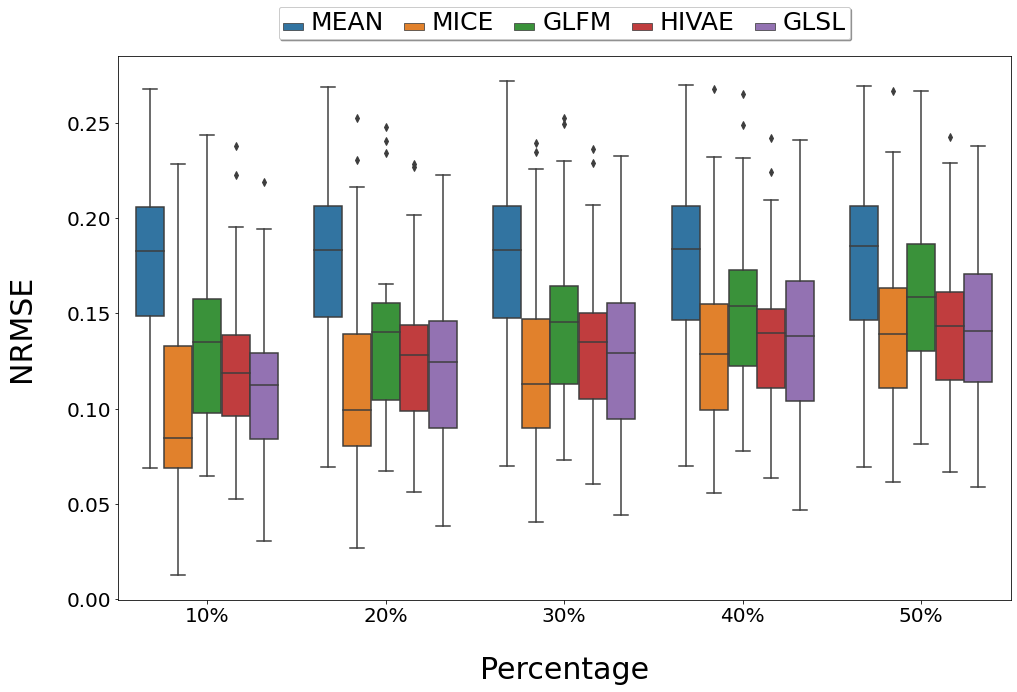

In [24]:
from matplotlib import pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(16,10))
g = sns.boxplot(data=df_plot,x="percentage", y="NRMSE", hue="method", ax = ax)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.10),
          ncol=5, fancybox=True, shadow=True)
plt.setp(ax.get_legend().get_texts(), fontsize='25') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='0') # for legend title
ax.tick_params(axis="x", labelsize=20) # x ticks font size
ax.tick_params(axis="y", labelsize=20) # y ticks font size
plt.xlabel('Percentage', fontsize=30, labelpad=30)
plt.ylabel('NRMSE', fontsize=30, labelpad=30)

plt.savefig('missing_plots/nrmse_plot.pdf')  

## 2.3 - Nemenyi tests

Missing percentage: 10%


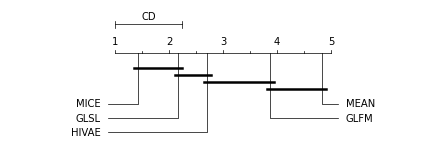

Missing percentage: 20%


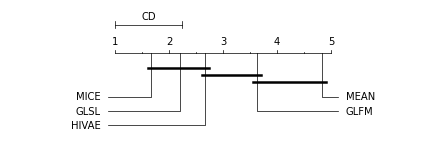

Missing percentage: 30%


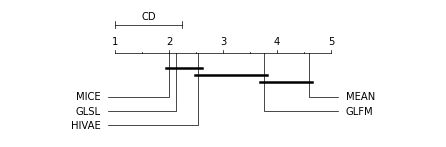

Missing percentage: 40%


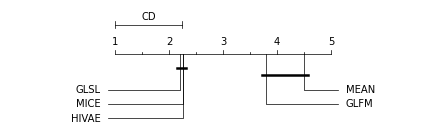

Missing percentage: 50%


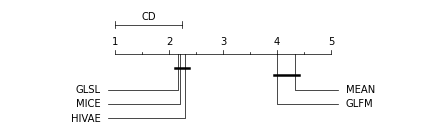

In [25]:
import Orange
import matplotlib.pyplot as plt

n_datasets = nrmse_dfs[0].shape[0]

for i in range(0, nrmse_mean_rank.shape[0]):
    avranks = nrmse_mean_rank[selected_methods].iloc[i].values
    cd = Orange.evaluation.compute_CD(avranks, n_datasets) #tested on 30 datasets
    Orange.evaluation.graph_ranks(avranks, selected_methods, cd=cd, width=6, textspace=1.5)   
    print("Missing percentage: " + str(nrmse_mean_rank["miss_percentage"].iloc[i]))
    plt.savefig('nrmse_' + str(nrmse_mean_rank["miss_percentage"].iloc[i]).replace("%", "") + '.pdf')  
    plt.show()

# 3 - Average error

Iteramos por los directorios de **discrete**, **continuous** y **mixed**, agrupando sus errores como average_error

In [26]:
import pandas as pd
import json
import statistics as stats
from os import listdir
import numpy as np

methods = [
    "MEAN",  
    "MICE", 
    "GLFM", 
    "HIVAE", 
    "VBSEM",
    "glsl_EMPTY"
]
max_percentage = 6
n_runs = 5
selected_directories = ["discrete", "continuous", "mixed"]
average_error_dfs = []

# Iterate through the missing percentage values, and for each dataset, recover the methods' results
for i in range(1, max_percentage):
    miss_percentage_string = "0" + str(i)

    df_error_results = pd.DataFrame()

    for directory in selected_directories:
        
        data_names = directories[directory]

        for data_name in data_names:
            error_results = {"dataset": data_name}
            
            for method_name in methods:
                json_name = data_name + "_" + miss_percentage_string + "_results_" + method_name + ".json"
                full_path = "../../missing_results/"+ directory +"/"+data_name+"/"+json_name
                with open(full_path) as json_file:
                    json_data = json.load(json_file)
                    runs_data = json_data["runs"]
                    errors = []
                    learning_times = []
                    for i in range(1, n_runs + 1):
                        if directory == "discrete":
                            errors.append(1.0 - runs_data["run_" + str(i)]["accuracy"])
                        elif directory == "continuous":
                            errors.append(runs_data["run_" + str(i)]["nrmse"])
                        else:
                            errors.append(runs_data["run_" + str(i)]["average_error"])

                    avg_error = stats.mean(errors)
                    stdev_error = stats.stdev(errors)

                    error_results[method_name] = avg_error

            df_error_results = df_error_results.append(error_results, ignore_index=True)

    average_error_dfs.append(df_error_results)
    
for i in range(0, max_percentage-1):
    average_error_dfs[i]["GLSL"] = average_error_dfs[i][['VBSEM','glsl_EMPTY']].min(axis=1)

## 3.1 - Average rank table

In [27]:
selected_methods = [
    "MEAN",
    "MICE", 
    "GLFM", 
    "HIVAE", 
    "GLSL"

]
average_error_mean_rank = pd.DataFrame(columns=selected_methods)
average_error_std_rank = pd.DataFrame(columns=selected_methods)
error_rank_dfs = []

for i in range(0,5):
    error_rank_df = average_error_dfs[i][selected_methods].rank(method="max", axis = 1, ascending = 1)
    error_rank_df["dataset"] = average_error_dfs[i]["dataset"]
    error_rank_dfs.append(error_rank_df)
    average_error_mean_rank = average_error_mean_rank.append(error_rank_df[selected_methods].mean(axis = 0), ignore_index=True)
    average_error_std_rank = average_error_std_rank.append(error_rank_df[selected_methods].std(axis = 0), ignore_index=True)

average_error_mean_rank["miss_percentage"] = [str(i)+"0%" for i in range(1,6)]
average_error_std_rank["miss_percentage"] = [str(i)+"0%" for i in range(1,6)]
average_error_mean_rank.round(2)
# average_error_std_rank

,MEAN,MICE,GLFM,HIVAE,GLSL,miss_percentage
0,4.81,2.08,3.83,2.47,1.81,10%
1,4.78,2.25,3.58,2.36,2.03,20%
2,4.58,2.64,3.61,2.19,2.00,30%
3,4.56,2.86,3.64,2.00,1.97,40%
4,4.31,2.67,3.92,1.97,2.22,50%


In [28]:
average_error_std_rank.round(2)

,MEAN,MICE,GLFM,HIVAE,GLSL,miss_percentage
0,0.71,1.08,0.65,0.81,0.92,10%
1,0.76,1.13,0.87,0.83,1.18,20%
2,0.94,1.22,0.93,0.79,1.31,30%
3,0.84,1.38,0.76,0.83,1.21,40%
4,0.98,1.35,0.91,0.81,1.33,50%


In [29]:
# Show the rank/error of each method for each dataset for a specific missing percentage
#error_rank_dfs[4]
#average_error_dfs[0]

## 3.2 - Error plots

In [30]:
df_plot = pd.DataFrame(columns=["dataset", "method", "percentage", "AvgErr"])

for percentage in range(0, 5):
    df = average_error_dfs[percentage]
    percentage_string = str((percentage+1)*10) + "%"
    for method in selected_methods:
        for i in range(len(df)):
            row = df.loc[i]
            instance = {"dataset": row["dataset"]}
            instance["percentage"] = percentage_string
            instance["method"] = method
            instance["AvgErr"] = row[method]
            df_plot = df_plot.append(instance, ignore_index=True)

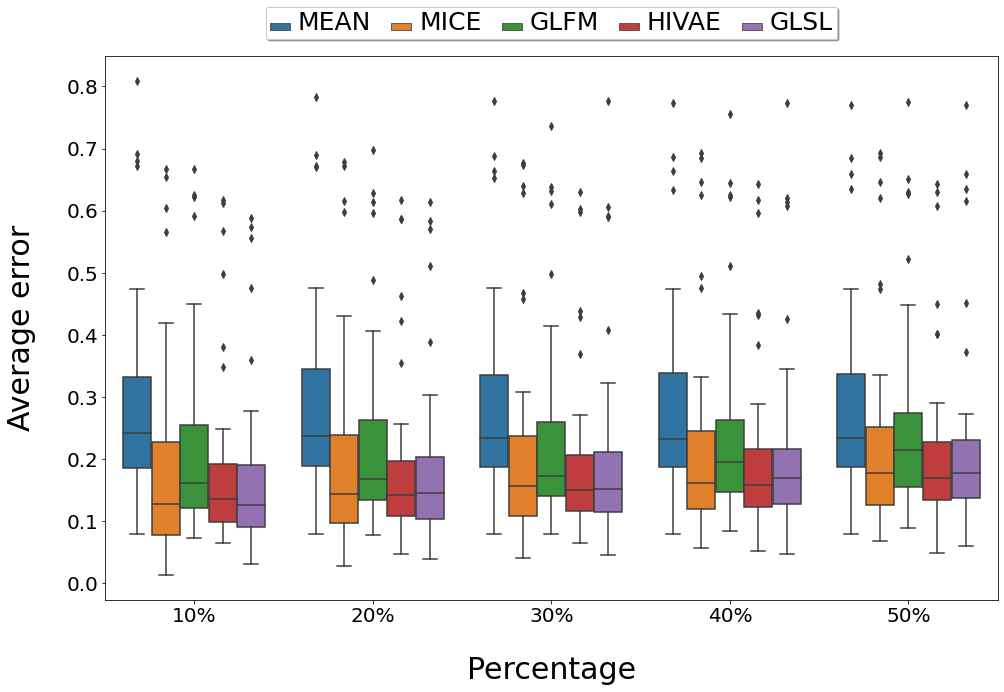

In [31]:
from matplotlib import pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(16,10))
g = sns.boxplot(data=df_plot,x="percentage", y="AvgErr", hue="method", ax = ax)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.10),
          ncol=5, fancybox=True, shadow=True)
plt.setp(ax.get_legend().get_texts(), fontsize='25') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='0') # for legend title
ax.tick_params(axis="x", labelsize=20) # x ticks font size
ax.tick_params(axis="y", labelsize=20) # y ticks font size
plt.xlabel('Percentage', fontsize=30, labelpad=30)
plt.ylabel('Average error', fontsize=30, labelpad=30)

plt.savefig('missing_plots/average_error_plot.pdf')  

## 3.3 - Friedman test

In [32]:
from scipy.stats import friedmanchisquare as friedman_test


for i in range(0,5):
    selected_average_error_df = average_error_dfs[i]

    stat,p = friedman_test(selected_average_error_df["MEAN"], 
                  selected_average_error_df["MICE"], 
                  selected_average_error_df["GLFM"], 
                  selected_average_error_df["HIVAE"], 
                  selected_average_error_df["GLSL"])
    print(str(i+1)+"0%: " + str(p))

10%: 2.2617580438389636e-19
20%: 4.619289669206321e-16
30%: 9.914832177868473e-14
40%: 1.7770241078253232e-14
50%: 1.189778941042108e-12


## 3.4 - Nemenyi tests

Missing percentage: 10%


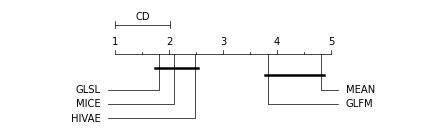

Missing percentage: 20%


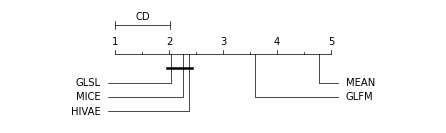

Missing percentage: 30%


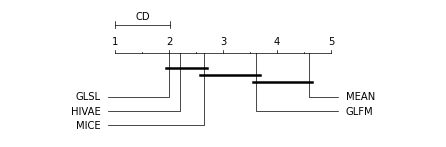

Missing percentage: 40%


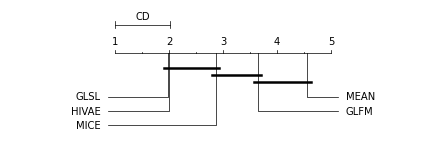

Missing percentage: 50%


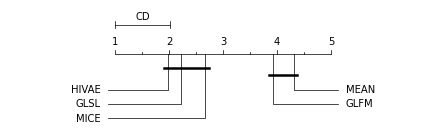

In [33]:
import Orange
import matplotlib.pyplot as plt

n_datasets = average_error_dfs[0].shape[0]

for i in range(0, average_error_mean_rank.shape[0]):
    avranks = average_error_mean_rank[selected_methods].iloc[i].values
    cd = Orange.evaluation.compute_CD(avranks, n_datasets) #tested on 30 datasets
    Orange.evaluation.graph_ranks(avranks, selected_methods, cd=cd, width=6, textspace=1.5)
    print("Missing percentage: " + str(average_error_mean_rank["miss_percentage"].iloc[i]))
    plt.savefig('missing_plots/average_error_' + str(average_error_mean_rank["miss_percentage"].iloc[i]).replace("%", "") + '.pdf')  
    plt.show()

# 4 - Learning time

Iteramos por los directorios de **discrete**, **continuous** y **mixed**, agrupando sus tiempos de ejecucion

In [34]:
import pandas as pd
import json
import statistics as stats
from os import listdir
import numpy as np

methods = [
    "MEAN", 
    "GLFM", 
    "HIVAE", 
    "MICE", 
    "VBSEM",
    "glsl_EMPTY"
]
max_percentage = 6
n_runs = 5
selected_directories = ["discrete", "continuous", "mixed"]
time_dfs = []


# Iterate through the missing percentage values, and for each dataset, recover the methods' results
for i in range(1, max_percentage):
    miss_percentage_string = "0" + str(i)

    df_time_results = pd.DataFrame()

    for directory in selected_directories:
        
        data_names = directories[directory]

        for data_name in data_names:
            time_results = {"dataset": data_name}
            for method_name in methods:
                json_name = data_name + "_" + miss_percentage_string + "_results_" + method_name + ".json"
                full_path = "../../missing_results/"+ directory +"/"+data_name+"/"+json_name
                with open(full_path) as json_file:
                    json_data = json.load(json_file)
                    runs_data = json_data["runs"]
                    learning_times = []
                    for i in range(1, n_runs + 1):
                        learning_times.append(runs_data["run_" + str(i)]["learning_time"]) 

                    avg_learning_time = stats.mean(learning_times) / 1000
                    stdev_learning_time = stats.stdev(learning_times) / 1000

                    time_results[method_name] = avg_learning_time

            df_time_results = df_time_results.append(time_results, ignore_index=True)

    time_dfs.append(df_time_results)
    
for i in range(0, max_percentage-1):
    time_dfs[i]["GLSL"] = time_dfs[i]['glsl_EMPTY']

## 4.1 -Average rank table

In [35]:
selected_methods = [
    "MEAN",
    "MICE", 
    "GLFM", 
    "HIVAE", 
    "GLSL"
]
time_mean_rank = pd.DataFrame(columns=selected_methods)
time_std_rank = pd.DataFrame(columns=selected_methods)

for i in range(0,5):
    time_rank_df = time_dfs[i][selected_methods].rank(method="max", axis = 1, ascending = 1)
    time_mean_rank = time_mean_rank.append(time_rank_df.mean(axis = 0), ignore_index=True)
    time_std_rank = time_std_rank.append(time_rank_df.std(axis = 0), ignore_index=True)

time_mean_rank["miss_percentage"] = [str(i)+"0%" for i in range(1,6)]
time_std_rank["miss_percentage"] = [str(i)+"0%" for i in range(1,6)]
time_mean_rank.round(2)

,MEAN,MICE,GLFM,HIVAE,GLSL,miss_percentage
0,1.0,2.0,3.36,3.64,5.00,10%
1,1.0,2.0,3.33,3.72,4.94,20%
2,1.0,2.0,3.33,3.69,4.97,30%
3,1.0,2.0,3.36,3.75,4.89,40%
4,1.0,2.0,3.31,3.78,4.92,50%


In [36]:
time_std_rank.round(2)

,MEAN,MICE,GLFM,HIVAE,GLSL,miss_percentage
0,0.0,0.0,0.49,0.49,0.00,10%
1,0.0,0.0,0.48,0.57,0.23,20%
2,0.0,0.0,0.48,0.52,0.17,30%
3,0.0,0.0,0.49,0.60,0.40,40%
4,0.0,0.0,0.47,0.59,0.28,50%


## 4.2 - Nemenyi tests

Missing percentage: 10%


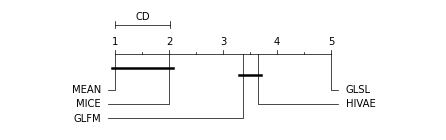

Missing percentage: 20%


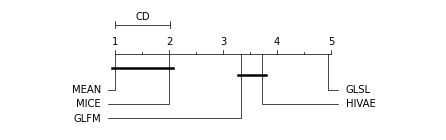

Missing percentage: 30%


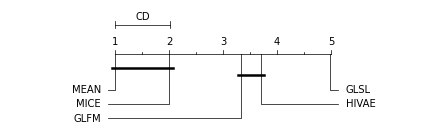

Missing percentage: 40%


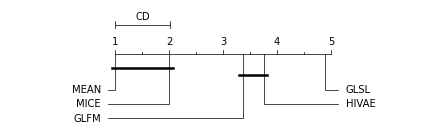

Missing percentage: 50%


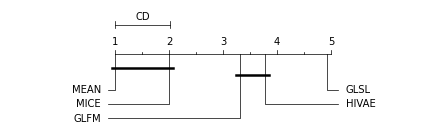

In [37]:
import Orange
import matplotlib.pyplot as plt

n_datasets = time_dfs[0].shape[0]

for i in range(0, time_mean_rank.shape[0]):
    avranks = time_mean_rank[selected_methods].iloc[i].values
    cd = Orange.evaluation.compute_CD(avranks, n_datasets) #tested on 30 datasets
    Orange.evaluation.graph_ranks(avranks, selected_methods, cd=cd, width=6, textspace=1.5)
    print("Missing percentage: " + str(time_mean_rank["miss_percentage"].iloc[i]))
    plt.savefig('missing_plots/learning_time_' + str(time_mean_rank["miss_percentage"].iloc[i]).replace("%", "") + '.pdf')  
    plt.show()